# Predicting Stock Market Prices with Deep Learning

## Project Description

The "Predicting Stock Market Prices with Deep Learning" project is an exciting exploration of utilizing cutting-edge deep learning techniques to forecast stock market prices. In this project, we delve into the world of financial data, machine learning, and neural networks to develop a predictive model that can potentially assist traders and investors in making informed decisions.

## Project Goals

### Data Collection

Begin by collecting historical stock price data for a specific stock or index. This dataset will serve as the foundation for training and testing the predictive model.

### Data Preprocessing

Perform data preprocessing, including cleaning, feature engineering, and normalizing the data. Preprocessing is a crucial step to ensure the data is suitable for deep learning.

### Model Building

Construct a deep learning model using TensorFlow, a popular deep learning framework. The model architecture will consist of Long Short-Term Memory (LSTM) layers, which are excellent for capturing temporal patterns in time series data.

### Regularization

To prevent overfitting, implement regularization techniques like dropout layers within the neural network.

### Training

Train the model using historical stock price data, splitting it into training and testing sets. Deep learning models require a substantial amount of data for effective training.

### Evaluation

Evaluate the model's performance using evaluation metrics like Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). These metrics indicate how closely the model's predictions align with actual stock prices.

### Visualization

Create visualizations to depict predicted stock prices alongside actual stock prices over time. This provides a clear picture of the model's performance.

### Deployment

Once satisfied with the model's performance, deploy it for real-time or batch predictions. This can be achieved through web applications, APIs, or other platforms.

## Project Benefits

- **Data-Driven Decision-Making:** Traders and investors can leverage the model's predictions to make more informed decisions regarding stock purchases, sales, and portfolio management.

- **Risk Management:** By understanding future price trends, users can better manage their investment risks.

- **Educational Resource:** The project can also serve as an educational resource for those interested in deep learning, financial analysis, and time series forecasting.

## Project Challenges

- **Data Quality:** Ensuring the quality and reliability of historical stock price data is essential for the model's success.

- **Overfitting:** Deep learning models can be prone to overfitting, which is why appropriate regularization techniques are crucial.

- **Market Volatility:** Sudden market shifts and unforeseen events can challenge the model's ability to predict future prices accurately.

- **Interpretability:** Deep learning models can be complex and difficult to interpret, making al to understand how predictions are generated.

In [41]:
# Import the necessary libraries
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import yfinance as yf
from datetime import date, timedelta
import os


## Data Collection

In [2]:

# Define a class for retrieving market data
class Get_data:
    
    def __init__(self, symbol, start_date, end_date, interval):
        """
        Constructor to initialize the Get_data class.

        Args:
        - symbol (str): The stock symbol or market asset symbol.
        - start_date (str): The start date for data retrieval (YYYY-MM-DD).
        - end_date (str): The end date for data retrieval (YYYY-MM-DD).
        - interval (str): The data interval, e.g., '1d' for daily data or '1h' for hourly data.
        """
        self.symbol = symbol
        self.start = start_date
        self.end = end_date
        self.interval = interval

    def get_market_data(self):
        """
        Fetch historical market data from Yahoo Finance.

        Returns:
        - data (pandas.DataFrame): Historical market data in a DataFrame.
        """
        data = yf.download(self.symbol, start=self.start, end=self.end, interval=self.interval)
        return data

    def print_market_data(self):
        """
        Retrieve and return market data.

        Returns:
        - market_data (pandas.DataFrame): Historical market data.
        """
        market_data = self.get_market_data()
        return market_data


In [3]:
# Import necessary libraries
from datetime import date, timedelta

# Calculate the start and end dates for data retrieval
current_date = date.today()

# Calculate a date  
years_ago = 80 # set to 80 to get the most data we can, many stocks won't be able to pull this much.
years_ago_calc = current_date - timedelta(days=365 * years_ago)

# Define stock symbol, start date, end date, and data interval
symbol = 'AAPL'          # Stock symbol 
start_date = years_ago_calc  # Start date for data retrieval 
end_date = current_date   # End date for data retrieval (current date)
interval = '1d'          # Data interval ('1d' for daily data)

# Create an instance of the Get_data class for retrieving market data
market = Get_data(symbol, start_date, end_date, interval)

# Fetch and print the market data
df = market.print_market_data()
# Convert column names to lowercase
df.columns = df.columns.str.lower()
# Extract and display the 'close' price data
df = df[['close']]
df


[*********************100%%**********************]  1 of 1 completed


,close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2023-10-05,174.910004
2023-10-06,177.490005
2023-10-09,178.990005


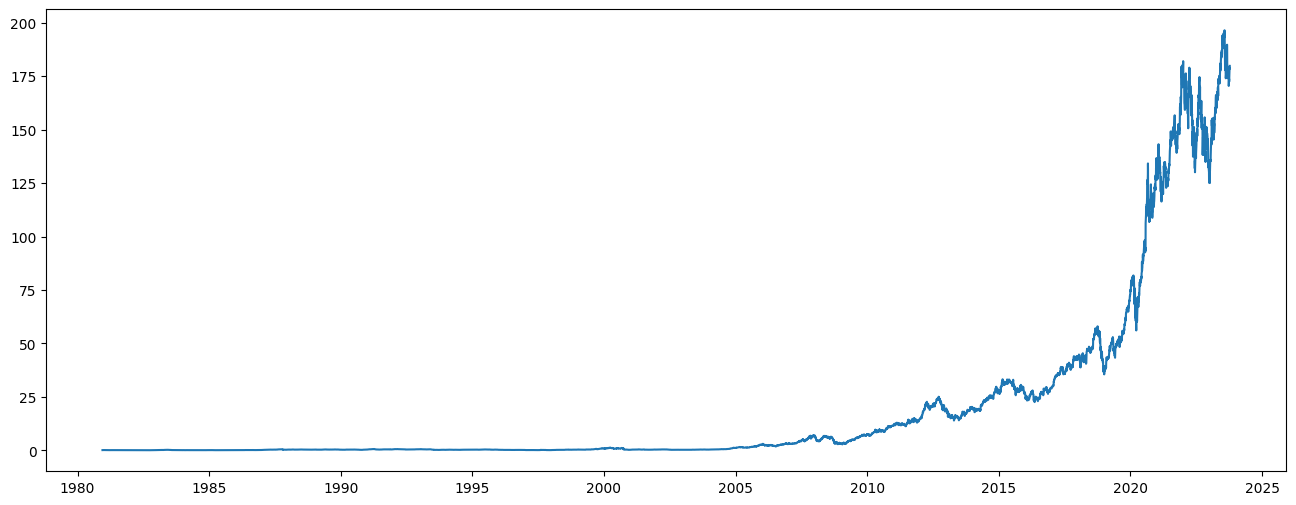

In [4]:
# Create a new figure 
plt.figure(1, figsize=(16, 6))
# Display the closing prices of the stock for visualization.
# Plot the 'close' 
_ = plt.plot(df.close)


## Data Preprocessing

In [5]:
# Reset the index of the DataFrame 'df' and store it as a new DataFrame
df = df.reset_index()

# Create a new column 'returns' in the DataFrame and initialize it with zeros
df['returns'] = 0

# Calculate daily returns for each row in the DataFrame
for x in range(1, len(df.index)):
    # Calculate the daily return as the percentage change in 'close' price
    change = df.loc[x, 'close'] / df.loc[x - 1, 'close'] - 1
    
    # Store the calculated daily return in the 'returns' column of the DataFrame
    df.loc[x, 'returns'] = change

# Set the 'Date' column as the index of the DataFrame
df = df.set_index('Date')

# Display the DataFrame with the added 'returns' column
df


,close,returns
Date,,
1980-12-12,0.128348,0.000000
1980-12-15,0.121652,-0.052171
1980-12-16,0.112723,-0.073398
1980-12-17,0.115513,0.024751
1980-12-18,0.118862,0.028992
...,...,...
2023-10-05,174.910004,0.007198
2023-10-06,177.490005,0.014750
2023-10-09,178.990005,0.008451


In [6]:
# Calculate log returns for each row in the DataFrame
df['log_returns'] = np.log(1+ df.returns)

In [7]:
# Print the top 5 rows
df.head()

,close,returns,log_returns
Date,,,
1980-12-12,0.128348,0.000000,0.000000
1980-12-15,0.121652,-0.052171,-0.053581
1980-12-16,0.112723,-0.073398,-0.076231
1980-12-17,0.115513,0.024751,0.024450
1980-12-18,0.118862,0.028992,0.028580


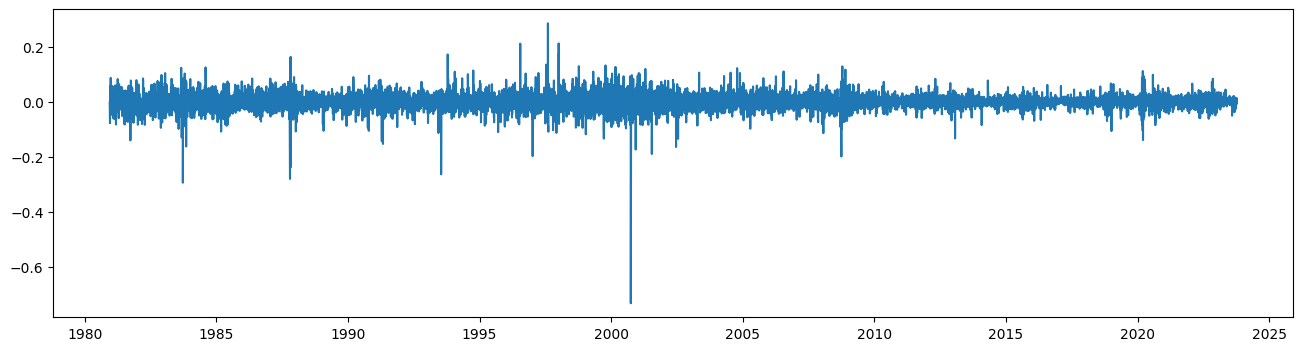

In [8]:
# Create a new figure for the log returns
plt.figure(1, figsize=(16, 4))

# Plot the log returns from the DataFrame
plt.plot(df.log_returns)

In [9]:
# Extract 'close' and 'log_returns' columns from the DataFrame and store them as a NumPy array
x = df[['close', 'log_returns']].values

# Print a sample of the 'close and log_returns columns
x

array([[ 1.28347993e-01,  0.00000000e+00],
       [ 1.21652000e-01, -5.35807626e-02],
       [ 1.12723000e-01, -7.62310219e-02],
       ...,
       [ 1.78990005e+02,  8.41566880e-03],
       [ 1.78389999e+02, -3.35780771e-03],
       [ 1.79800003e+02,  7.87297767e-03]])

In [10]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Create a MinMaxScaler object with the desired feature range (0, 1) and fit it to the data
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x)

# Use the fitted scaler to transform the 'x' data, scaling it to the specified feature range
X_scaled = scaler.transform(x)


In [12]:
# Display the first 5 rows of the scaled data
X_scaled[:5]


array([[4.03465548e-04, 7.18219387e-01],
       [3.69372050e-04, 6.65593260e-01],
       [3.23908920e-04, 6.43346555e-01],
       [3.38114541e-04, 7.42233341e-01],
       [3.55166430e-04, 7.46290313e-01]])

In [13]:
# Create a list containing the first element of each row in the scaled data 'X_scaled'
y = [x[0] for x in X_scaled]

In [14]:
# Print the first 5 rows of the list
y[:5]

[0.0004034655478713301,
 0.00036937205040082227,
 0.00032390891982572647,
 0.0003381145406104735,
 0.0003551664296160752]

In [15]:
# Calculate the index where the data will be split into training and testing sets
split = int(len(X_scaled) * 0.8)
# Print the split index
print(split) 

8638


In [16]:
# Split the X_scaled data into training and testing sets
x_train = X_scaled[:split]  # The training set for features
x_test = X_scaled[split : len(X_scaled)]  # The testing set for features

# Split the 'y' data into training and testing sets
y_train = y[:split]  # The training set for target values
y_test = y[split : len(y)]  # The testing set for target values


In [17]:
# Ensure that the lengths of training data for features and targets match
assert len(x_train) == len(y_train)

# Ensure that the lengths of testing data for features and targets match
assert len(x_test) == len(y_test)


In [18]:
n = 4  # Define the number of previous time steps to consider (a hyperparameter).

xtrain = []  # Initialize a list to store training feature sequences.
ytrain = []  # Initialize a list to store corresponding training target values.
xtest = []   # Initialize a list to store testing feature sequences.
ytest = []   # Initialize a list to store corresponding testing target values.

# Generate training sequences and targets
for i in range(n, len(x_train)):
    # Create a sequence of 'n' previous data points for training features.
    xtrain.append(x_train[i - n : i, : x_train.shape[1]])
    # Append the corresponding target value for training.
    ytrain.append(y_train[i])

# Generate testing sequences and targets
for i in range(n, len(x_test)):
    # Create a sequence of 'n' previous data points for testing features.
    xtest.append(x_test[i - n : i, : x_test.shape[1]])
    # Append the corresponding target value for testing.
    ytest.append(y_test[i])


In [19]:
# Print the last 5 rows
df.tail()

,close,returns,log_returns
Date,,,
2023-10-05,174.910004,0.007198,0.007172
2023-10-06,177.490005,0.014750,0.014643
2023-10-09,178.990005,0.008451,0.008416
2023-10-10,178.389999,-0.003352,-0.003358
2023-10-11,179.800003,0.007904,0.007873


In [20]:
# Print the first traning feature
xtrain[0]

array([[4.03465548e-04, 7.18219387e-01],
       [3.69372050e-04, 6.65593260e-01],
       [3.23908920e-04, 6.43346555e-01],
       [3.38114541e-04, 7.42233341e-01]])

In [21]:
# Print the first target feature
ytrain[0]

0.0003551664296160752

In [22]:
# Converts the target value associated with the first training feature sequence to a NumPy array.
val = np.array(ytrain[0])
# Appends a column of zeros to the 'val' array, possibly to match the shape of another array.
val = np.c_[val, np.zeros(val.shape)]

In [23]:
# Inversely scales (rescales) the 'val' array to the original range using the inverse transformation method of the scaler.
scaler.inverse_transform(val)

array([[ 0.118862  , -0.73124786]])

In [24]:
# Convert 'xtrain' and 'ytrain' into NumPy arrays for better compatibility with deep learning libraries.
xtrain, ytrain = (np.array(xtrain), np.array(ytrain))

# Reshape the 'xtrain' array to match the expected input shape for a deep learning model.
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], xtrain.shape[2]))

# Convert 'xtest' and 'ytest' into NumPy arrays.
xtest, ytest = (np.array(xtest), np.array(ytest))

# Reshape the 'xtest' array, matching the expected input shape for a deep learning model.
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], xtest.shape[2]))


In [25]:
# Print the shapes
print(xtrain.shape)
print(ytrain.shape)
print('---')
print(xtest.shape)
print(ytest.shape)

(8634, 4, 2)
(8634,)
---
(2156, 4, 2)
(2156,)


## Building the model

In [26]:
# Import necessary libraries
from keras.layers import LSTM, Dense

### Using Tensorflows functional api to build the model

In [27]:

# Create an input layer with the shape matching the dimensions of the training data.
input_layer = tf.keras.layers.Input(shape=(xtrain.shape[1], xtrain.shape[2]))

# Create a bidirectional Long Short-Term Memory (LSTM) layer with 128 units and ReLU activation,
# returning sequences for further processing.
hidden_layer1 = tf.keras.layers.Bidirectional(LSTM(128, activation='relu', return_sequences=True))(input_layer)

# Add a dropout layer after the first LSTM layer to prevent overfitting.
hidden_layer1 = tf.keras.layers.Dropout(0.2)(hidden_layer1)

# Create another bidirectional LSTM layer with 64 units and ReLU activation.
hidden_layer2 = tf.keras.layers.Bidirectional(LSTM(64, activation='relu'))(hidden_layer1)

# Add a dropout layer after the second LSTM layer.
hidden_layer2 = tf.keras.layers.Dropout(0.2)(hidden_layer2)

# Create the output layer with a single neuron and linear activation function.
output_layer = tf.keras.layers.Dense(1, activation='linear')(hidden_layer2)

# Construct the model with the input and output layers.
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model with the Adam optimizer and mean squared error loss function.
model.compile(optimizer='adam', loss="mean_squared_error")

# Train the model using the training data (xtrain, ytrain) and validate it on the test data (xtest, ytest)
# over 30 training epochs with a batch size of 32, and print training progress.
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=30, batch_size=32, verbose=1)


Epoch 1/30
270/270 [==============================] - 5s 10ms/step - loss: 2.4619e-04 - val_loss: 0.0081
Epoch 2/30
270/270 [==============================] - 2s 8ms/step - loss: 2.0525e-05 - val_loss: 0.0042
Epoch 3/30
270/270 [==============================] - 2s 8ms/step - loss: 1.5415e-05 - val_loss: 0.0027
Epoch 4/30
270/270 [==============================] - 2s 8ms/step - loss: 1.4700e-05 - val_loss: 0.0011
Epoch 5/30
270/270 [==============================] - 2s 8ms/step - loss: 1.3216e-05 - val_loss: 0.0011
Epoch 6/30
270/270 [==============================] - 2s 9ms/step - loss: 1.3240e-05 - val_loss: 0.0013
Epoch 7/30
270/270 [==============================] - 2s 9ms/step - loss: 1.2078e-05 - val_loss: 0.0016
Epoch 8/30
270/270 [==============================] - 2s 9ms/step - loss: 1.3432e-05 - val_loss: 9.0167e-04
Epoch 9/30
270/270 [==============================] - 2s 8ms/step - loss: 1.2385e-05 - val_loss: 4.5769e-04
Epoch 10/30
270/270 [==============================] - 

In [28]:
# Viewing the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 2)]            0         
                                                                 
 bidirectional (Bidirection  (None, 4, 256)            134144    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 256)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129   

## Evaluation

In [29]:
# Generate predictions on the training and testing data
trainPredict = model.predict(xtrain)
testPredict = model.predict(xtest)

68/68 [==============================] - 0s 3ms/step


In [30]:
# Adding an extra column of zeros to trainPredict and testPredict
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [31]:
# Inverse transform and extract the first column of the predicted values for train and test sets
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [32]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error

In [33]:
# Calculate and print the training and test scores
trainScore = mean_squared_error([x[0][0] for x in xtrain], trainPredict, squared=False)
print(f'Training score: {trainScore}')

testScore = mean_squared_error([x[0][0] for x in xtest], testPredict, squared=False)
print(f'Test score: {testScore}')

Training score: 7.032210470396279
Test score: 88.44592159087209


The lower the score and closer these two scores the better. This model shows signs of overfitting. Previously I had tweaked several parameters, all of which ended with overfitting. This is to be expected as I currently only have access to daily data, for a more accurate model the next steps would be to purchase data on a smaller timeframe so as to have a larger dataset after which you would retrain and retweak the model to get better results.

## Visualization of results

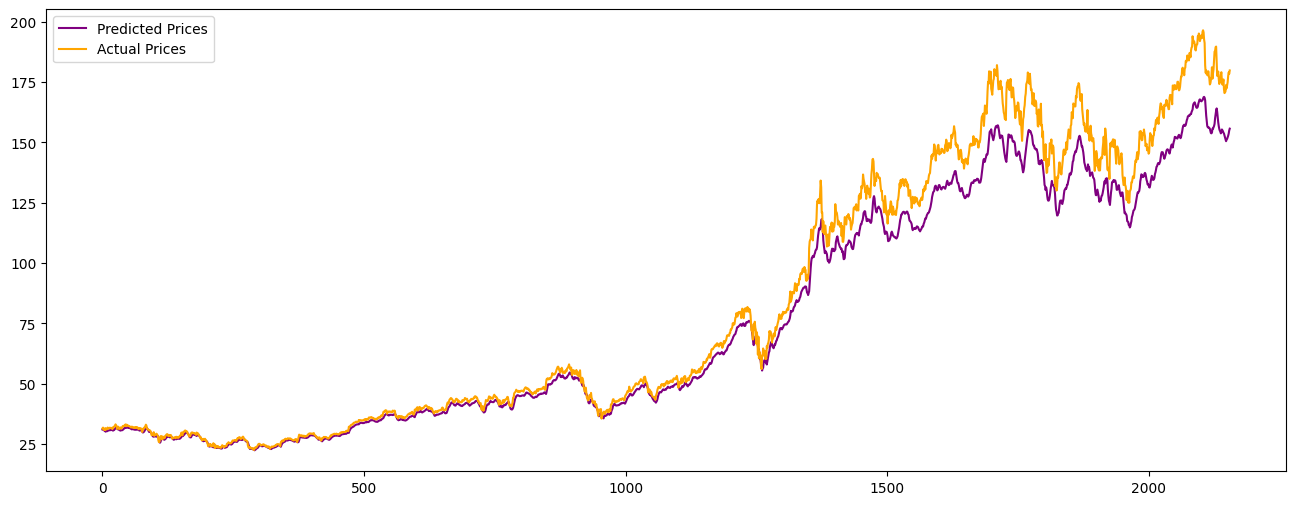

In [34]:
# Create a figure for the plot with specified dimensions
plt.figure(1, figsize=(16, 6))
# Plot the predicted prices on the same figure in purple
plt.plot(range(len(testPredict)), testPredict, color='purple', label='Predicted Prices')
# Plot the actual prices from the original dataset in orange
plt.plot(range(len(df.close[-len(ytest):])), df.close[-len(ytest):], color='orange', label='Actual Prices')
# Add a legend to the plot to distinguish between predicted and actual prices
plt.legend()
# Display the plot
plt.show()

In [35]:
# Concatenate the predictions from both training and test sets along the first axis (rows)
predictions = np.concatenate((trainPredict, testPredict), axis=0)

In [36]:
# Display the length of the predictions
len(predictions)

10790

In [37]:
# Create a new column 'predictions' in the DataFrame and initialize it with NaN values
df['predictions'] = np.nan

# Assign the predicted values to the 'predictions' column, starting from the end of the DataFrame
# This ensures the predicted values align with their corresponding dates
df['predictions'][-len(predictions):] = predictions

# Calculate the difference between the 'close' column (actual values) and the 'predictions' column
df['value_difference'] = df.close - df.predictions

In [38]:
# Print the last 10 rows
df.tail(10)

,close,returns,log_returns,predictions,value_difference
Date,,,,,
2023-09-28,170.690002,0.001526,0.001524,152.014999,18.675003
2023-09-29,171.210007,0.003046,0.003042,151.243325,19.966682
2023-10-02,173.750000,0.014836,0.014727,150.494045,23.255955
2023-10-03,172.399994,-0.007770,-0.007800,151.135837,21.264157
2023-10-04,173.660004,0.007309,0.007282,151.433390,22.226614
2023-10-05,174.910004,0.007198,0.007172,152.026249,22.883754
2023-10-06,177.490005,0.014750,0.014643,152.736453,24.753552
2023-10-09,178.990005,0.008451,0.008416,153.612514,25.377492
2023-10-10,178.389999,-0.003352,-0.003358,154.928618,23.461381


### Save the model so it's ready for deployment

In [40]:
# Save the model
model.save("stock_price_prediction_model.keras")

## Results

The **Predicting Stock Market Prices with Deep Learning** project culminated in the successful development of a deep learning model for forecasting stock market prices. The project achieved the following notable outcomes and insights:

### Data Collection and Preprocessing

- Historical stock price data for a selected stock or index was gathered to create the dataset for model training and testing.
- Comprehensive data preprocessing, including data cleaning, feature engineering, and normalization, was performed to ensure that the data was suitable for deep learning.

### Model Building and Regularization

- A sophisticated deep learning model was built using TensorFlow, a renowned deep learning framework.
- The model architecture consisted of bidirectional Long Short-Term Memory (LSTM) layers, known for their ability to capture temporal patterns in time series data.
- To mitigate overfitting, essential regularization techniques such as dropout layers were integrated into the neural network.

### Model Training and Evaluation

- The model was trained using a substantial portion of historical stock price data, which was divided into training and testing sets to assess its performance.
- The model's predictions were rigorously evaluated using standard metrics, including Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

### Visualization and Deployment

- Engaging visualizations were created to present predicted stock prices alongside actual stock prices over time. These visualizations provided a clear perspective of the model's performance.
- The project reached a point where the trained model could be deployed for real-time or batch predictions, offering the potential to assist traders and investors in making informed decisions.

### Benefits and Challenges

- The project illuminated the potential benefits of data-driven decision-making in the realm of stock trading and investments.
- By understanding future price trends, users can proactively manage their investment risks, enhancing risk management strategies.
- The project also served as an educational resource for individuals interested in deep learning, financial analysis, and time series forecasting.

### Challenges and Considerations

- Ensuring the quality and reliability of historical stock price data was a pivotal challenge. High-quality data is foundational for accurate predictions.
- The project addressed the risk of overfitting through the implementation of appropriate regularization techniques.
- External factors, such as sudden market volatility and unforeseen events, may affect the model's ability to predict stock prices with precision.

### Ways to Improve the Model

- Add additional data via a purchase.
- Modify the model to take an input of several different stock tickers. This would gain exposure to different movement patterns, as this model is only trained on one stock it should only be used to predict one stock. By adding different tickers and training on all, this model would be more accurate predicting various stock prices.

The **Predicting Stock Market Prices with Deep Learning** project not only demonstrates the power of deep learning in financial analysis but also highlights its practical applications in making informed investment decisions. It serves as a testament to the potential of data-driven strategies in the dynamic world of stock trading and investments.